<a href="https://colab.research.google.com/github/peisuke/generative_ai_notebooks/blob/main/22_LCM_LoRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# パッケージのインストール
!pip install diffusers omegaconf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 16.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=f3d8c54e98b32ec88749a06bc29b4ec187cf0ca0ca19b9f318a76a4f05c0334b
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e300888f4bca2d4c5a88
Successfully built antlr4-python3-runtime


In [2]:
# モデルのダウンロード
!wget https://huggingface.co/gsdf/Counterfeit-V3.0/resolve/main/Counterfeit-V3.0_fix_fp16.safetensors

--2023-12-14 02:57:41--  https://huggingface.co/gsdf/Counterfeit-V3.0/resolve/main/Counterfeit-V3.0_fix_fp16.safetensors
Resolving huggingface.co (huggingface.co)... 13.33.33.55, 13.33.33.20, 13.33.33.110, ...
Connecting to huggingface.co (huggingface.co)|13.33.33.55|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/cd/a1/cda186b5f62d61606b3595cd6660dfac2f529c6763be4f402dc61818e353d1d7/a54c944e4c04e9d9ca43468ef5b90ea0408bb6264829a4980de79a768df7179f?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27Counterfeit-V3.0_fix_fp16.safetensors%3B+filename%3D%22Counterfeit-V3.0_fix_fp16.safetensors%22%3B&Expires=1702781861&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcwMjc4MTg2MX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9yZXBvcy9jZC9hMS9jZGExODZiNWY2MmQ2MTYwNmIzNTk1Y2Q2NjYwZGZhYzJmNTI5YzY3NjNiZTRmNDAyZGM2MTgxOGUzNTNkMWQ3L2E1NGM5NDRlNGMwNGU5ZDljYTQzNDY4Z

In [3]:
from diffusers import StableDiffusionPipeline, LCMScheduler
import torch

# パイプラインの準備
pipe = StableDiffusionPipeline.from_single_file(
    "Counterfeit-V3.0_fix_fp16.safetensors",
    variant="fp16",
    torch_dtype=torch.float16,
).to("cuda")

# LoRAウェイトの準備
pipe.load_lora_weights("latent-consistency/lcm-lora-sdv1-5")

# スケジューラの準備
pipe.scheduler = LCMScheduler.from_config(pipe.scheduler.config)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

config.json:   0%|          | 0.00/4.52k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.55k [00:00<?, ?B/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/pipeline_utils.py:761: FutureWarning: `torch_dtype` is deprecated and will be removed in version 0.25.0. 
  deprecate("torch_dtype", "0.25.0", "")


pytorch_lora_weights.safetensors:   0%|          | 0.00/135M [00:00<?, ?B/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
The config attributes {'skip_prk_steps': True} were passed to LCMScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.


In [4]:
%%time

# プロンプトの準備
prompt = "1girl, green hair, sweater, looking at viewer, upper body, beanie, outdoors, watercolor, night, turtleneck,(waifu, anime, exceptional, best aesthetic, new, newest, best quality, masterpiece, extremely detailed:1.2)"
negative_prompt = "((bad hands)), ((mutated hands and fingers)), ((bad feet)), lowres, text, blurry, (ugly), logo, cropped, worst quality, jpeg, ((jpeg artifacts)), deleted, old, oldest, ((censored)), ((bad aesthetic)), (mosaic censoring, bar censor, blur censor), twitter username, watermark, low quality"

# 画像生成
image = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=4,
    guidance_scale=0,  # guide_scaleの無効化
    generator=torch.Generator("cpu").manual_seed(19),
).images[0]

  0%|          | 0/4 [00:00<?, ?it/s]

CPU times: user 1.41 s, sys: 113 ms, total: 1.52 s
Wall time: 3.6 s


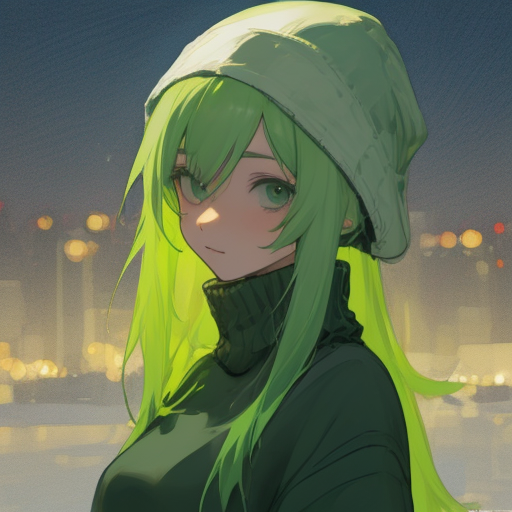

In [5]:
image